

# 🩺 Heart Disease Diagnosis Prediction

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings for clean output
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv("heart (1).csv")

# Display first 5 rows
print("🔹 First 5 Records:")
print(df.head())

# Shape of dataset
print("\n🔹 Dataset Shape (rows, columns):", df.shape)

# Check for missing values
print("\n🔹 Missing Values in Each Column:")
print(df.isnull().sum())

# Summary statistics
print("\n🔹 Summary Statistics:")
print(df.describe())


🔹 First 5 Records:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  

🔹 Dataset Shape (rows, columns): (918, 12)

🔹 Missing Values in Each Column:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS 

In [ ]:
# Step 2: Data Preprocessing

# 1️⃣ Check data types
print("🔹 Data Types:")
print(df.dtypes)

# 2️⃣ Check for categorical columns (non-numeric)
categorical_cols = df.select_dtypes(include=['object']).columns
print("\n🔹 Categorical Columns:", list(categorical_cols))

# If categorical columns exist, perform encoding
if len(categorical_cols) > 0:
    # Use Label Encoding for simplicity
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])
    print("\n✅ Label Encoding done for:", list(categorical_cols))
else:
    print("\n✅ No categorical columns found — all are numeric.")

# 3️⃣ Check for missing values again (just to confirm)
print("\n🔹 Missing Values After Encoding:")
print(df.isnull().sum())

# 4️⃣ Separate features (X) and target (y)
# Usually 'HeartDisease' column indicates heart disease (1 = yes, 0 = no)
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

print("\n🔹 Feature Matrix Shape:", X.shape)
print("🔹 Target Vector Shape:", y.shape)

# 5️⃣ Normalize numerical features (standardization)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\n✅ Feature Scaling Completed Successfully!")

🔹 Data Types:
Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
dtype: object

🔹 Categorical Columns: []

✅ No categorical columns found — all are numeric.

🔹 Missing Values After Encoding:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

🔹 Feature Matrix Shape: (918, 11)
🔹 Target Vector Shape: (918,)

✅ Feature Scaling Completed Successfully!


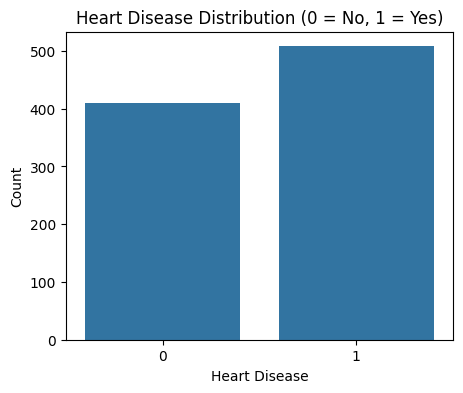

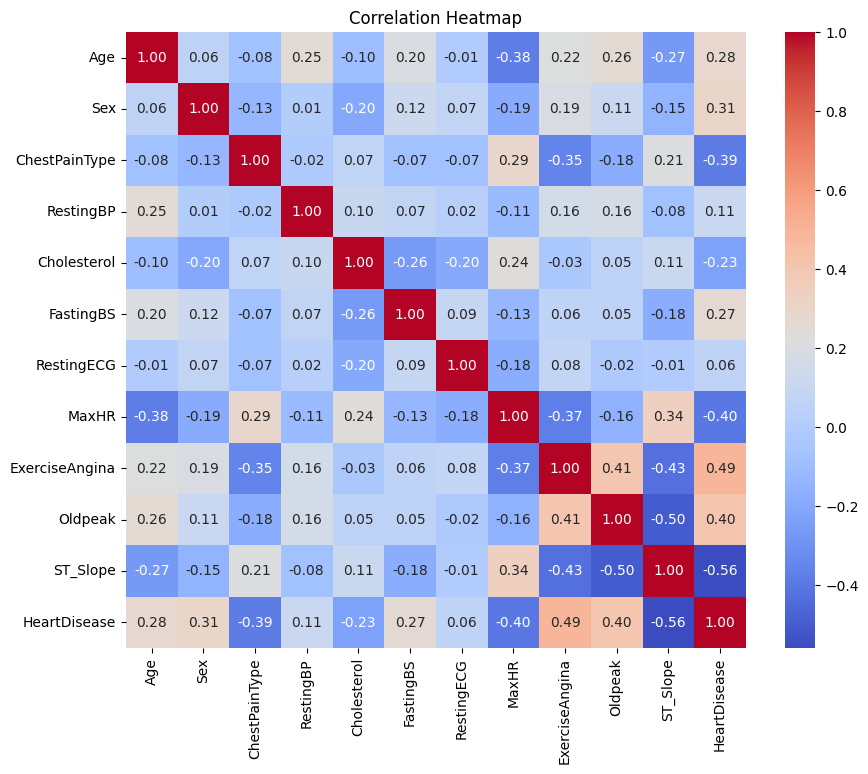

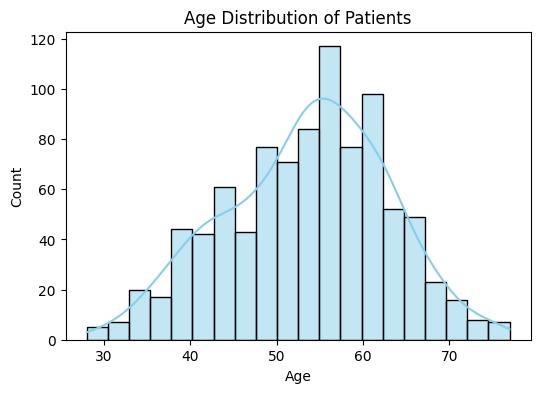

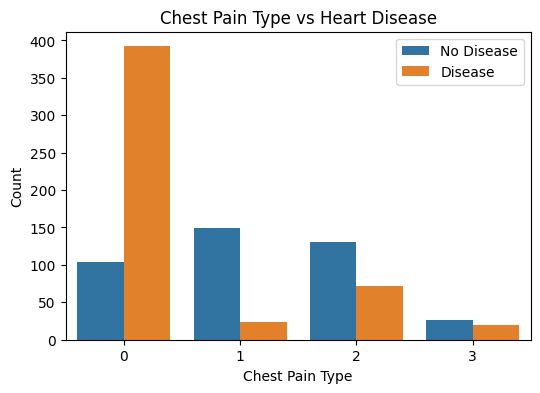

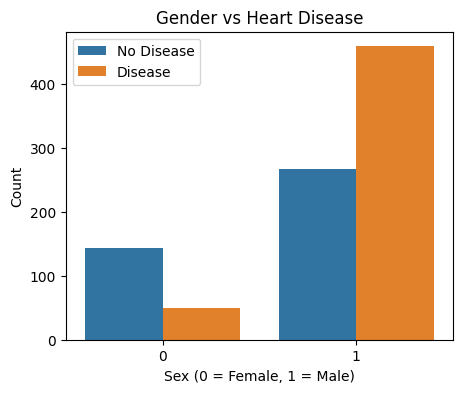

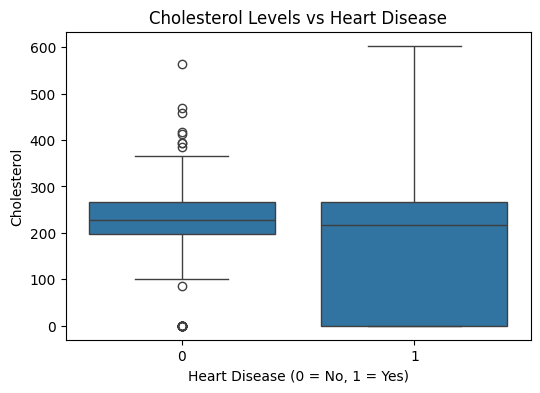

In [ ]:
# Step 3: Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Basic distribution of target variable
plt.figure(figsize=(5,4))
sns.countplot(x=y)
plt.title("Heart Disease Distribution (0 = No, 1 = Yes)")
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.show()

# 2️⃣ Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 3️⃣ Age distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# 4️⃣ Chest pain type vs heart disease (if column exists)
if 'ChestPainType' in df.columns and 'HeartDisease' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x='ChestPainType', hue='HeartDisease', data=df)
    plt.title("Chest Pain Type vs Heart Disease")
    plt.xlabel("Chest Pain Type")
    plt.ylabel("Count")
    plt.legend(['No Disease', 'Disease'])
    plt.show()

# 5️⃣ Gender vs heart disease (if column exists)
if 'Sex' in df.columns and 'HeartDisease' in df.columns:
    plt.figure(figsize=(5,4))
    sns.countplot(x='Sex', hue='HeartDisease', data=df)
    plt.title("Gender vs Heart Disease")
    plt.xlabel("Sex (0 = Female, 1 = Male)")
    plt.ylabel("Count")
    plt.legend(['No Disease', 'Disease'])
    plt.show()

# 6️⃣ Boxplot for cholesterol by disease presence
if 'Cholesterol' in df.columns and 'HeartDisease' in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='HeartDisease', y='Cholesterol', data=df)
    plt.title("Cholesterol Levels vs Heart Disease")
    plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
    plt.ylabel("Cholesterol")
    plt.show()

In [ ]:
# Step 4: Model Building

# 1️⃣ Split dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Data Split Successful:")
print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)

# 2️⃣ Train Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 3️⃣ Train XGBoost Classifier
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# 4️⃣ Predictions
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

# 5️⃣ Evaluate both models
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

print("\n🔹 Random Forest Performance:")
print("Accuracy:", round(accuracy_score(y_test, rf_pred)*100, 2), "%")
print("AUC Score:", round(roc_auc_score(y_test, rf_pred), 2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))

print("--------------------------------------------------")

print("\n🔹 XGBoost Performance:")
print("Accuracy:", round(accuracy_score(y_test, xgb_pred)*100, 2), "%")
print("AUC Score:", round(roc_auc_score(y_test, xgb_pred), 2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, xgb_pred))
print("\nClassification Report:\n", classification_report(y_test, xgb_pred))


✅ Data Split Successful:
Training set: (734, 11)
Testing set: (184, 11)

🔹 Random Forest Performance:
Accuracy: 87.5 %
AUC Score: 0.87

Confusion Matrix:
 [[70 12]
 [11 91]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86        82
           1       0.88      0.89      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184

--------------------------------------------------

🔹 XGBoost Performance:
Accuracy: 86.96 %
AUC Score: 0.87

Confusion Matrix:
 [[72 10]
 [14 88]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86        82
           1       0.90      0.86      0.88       102

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      

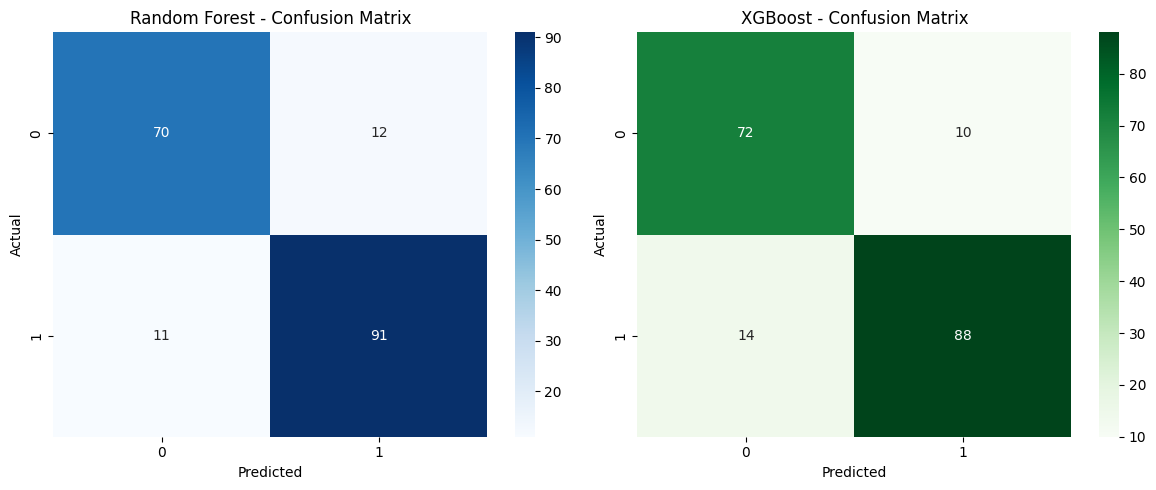

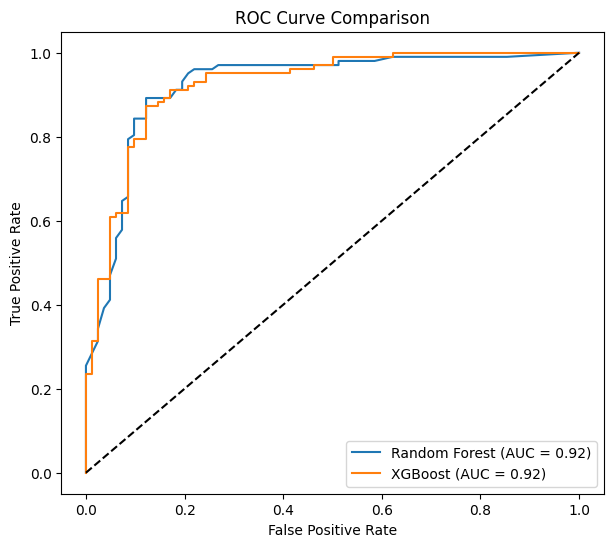

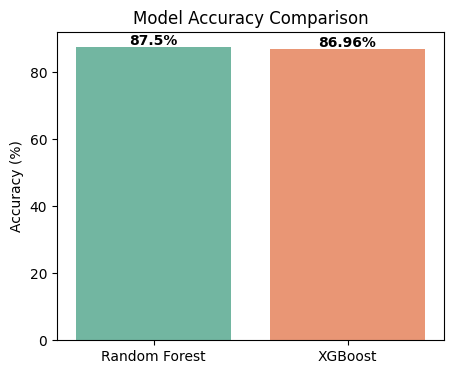

In [ ]:
# Step 5: Model Evaluation & Visualization

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, ConfusionMatrixDisplay

# 1️⃣ Confusion Matrix Visualization
plt.figure(figsize=(12,5))

# Random Forest Confusion Matrix
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# XGBoost Confusion Matrix
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, xgb_pred), annot=True, fmt='d', cmap='Greens')
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

# 2️⃣ ROC Curve Comparison
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:,1])

plt.figure(figsize=(7,6))
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {auc(rf_fpr, rf_tpr):.2f})")
plt.plot(xgb_fpr, xgb_tpr, label=f"XGBoost (AUC = {auc(xgb_fpr, xgb_tpr):.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# 3️⃣ Accuracy Comparison Bar Chart
rf_acc = round(accuracy_score(y_test, rf_pred)*100, 2)
xgb_acc = round(accuracy_score(y_test, xgb_pred)*100, 2)

plt.figure(figsize=(5,4))
sns.barplot(x=['Random Forest', 'XGBoost'], y=[rf_acc, xgb_acc], palette='Set2')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy (%)")
for i, v in enumerate([rf_acc, xgb_acc]):
    plt.text(i, v + 0.5, f"{v}%", ha='center', fontweight='bold')
plt.show()


In [1]:
# Step 6: Interactive Prediction with User Input

# Define encoder, scaler, and best_model before calling this function
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming X and y are defined in previous cells
# If not, you might need to load and preprocess the data here
# For this fix, I'm assuming X and y are available from previous execution

# Load the dataset
df = pd.read_csv("heart (1).csv")

# Fit the encoder on the categorical columns from the original dataframe
# (assuming df is available from previous steps)
categorical_cols = df.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# Separate features (X) and target (y)
# Usually 'HeartDisease' column indicates heart disease (1 = yes, 0 = no)
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Fit the scaler on the feature data X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data and train model (assuming X_scaled and y are available)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Train Random Forest Classifier (using the parameters from Step 4)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

best_model = rf_model # Or xgb_model based on preference


def health_tips(chol, resting_bp, fbs, max_hr, oldpeak):
    """Placeholder for health tips function."""
    tips = []
    if chol > 200:
        tips.append("Consider managing your cholesterol levels through diet and exercise.")
    if resting_bp > 130:
        tips.append("Monitor your blood pressure and consult a doctor for advice on managing hypertension.")
    if fbs == 1:
        tips.append("Manage your blood sugar levels, especially if you have diabetes.")
    if max_hr < 100:
        tips.append("Consult a doctor if you have a low maximum heart rate during exercise.")
    if oldpeak > 2:
        tips.append("Discuss your ST depression levels with a healthcare professional.")
    if not tips:
        tips.append("Maintain your healthy lifestyle!")
    return tips


def collect_user_input():
    # Import pandas inside the function
    import pandas as pd
    # Access global variables for encoder, scaler, and best_model
    global encoder, scaler, best_model

    print("\n--- 🩺 Heart Disease Diagnosis Assistant ---")
    print("Please answer the following questions carefully.\n")

    # 🧠 Expected Ranges for reference
    print("🔹 Age: 18–100 years")
    print("🔹 Resting BP: 80–200 mmHg")
    print("🔹 Cholesterol: 100–600 mg/dL")
    print("🔹 Max Heart Rate: 60–220 bpm")
    print("🔹 Oldpeak (ST depression): 0.0–6.5\n")

    # --- User Inputs with range validation ---
    def get_int(prompt, min_val, max_val):
        while True:
            try:
                val = int(input(prompt))
                if min_val <= val <= max_val:
                    return val
                else:
                    print(f"⚠️ Please enter a value between {min_val} and {max_val}.")
            except ValueError:
                print("❌ Invalid input. Please enter a number.")

    def get_float(prompt, min_val, max_val):
        while True:
            try:
                val = float(input(prompt))
                if min_val <= val <= max_val:
                    return val
                else:
                    print(f"⚠️ Please enter a value between {min_val} and {max_val}.")
            except ValueError:
                print("❌ Invalid input. Please enter a valid number.")

    def get_choice(prompt, choices):
        choices_str = "/".join(choices)
        while True:
            val = input(f"{prompt} ({choices_str}): ").strip().capitalize()
            if val in choices or val.upper() in choices:
                return val.upper() if val.upper() in choices else val
            else:
                print(f"⚠️ Please choose one of: {choices_str}")

    # Collecting all features step-by-step
    age = get_int("1️⃣ Enter your age: ", 18, 100)
    sex = get_choice("2️⃣ Are you Male or Female", ["M", "F"])
    cp = get_choice("3️⃣ Type of chest pain", ["ATA", "NAP", "ASY", "TA"])
    resting_bp = get_int("4️⃣ Enter your resting blood pressure (mmHg): ", 80, 200)
    chol = get_int("5️⃣ Enter your cholesterol level (mg/dL): ", 100, 600)
    fbs = get_choice("6️⃣ Is your fasting blood sugar > 120 mg/dL?", ["0", "1"])
    rest_ecg = get_choice("7️⃣ Resting ECG result", ["Normal", "ST", "LVH"])
    max_hr = get_int("8️⃣ Enter your maximum heart rate achieved (bpm): ", 60, 220)
    ex_angina = get_choice("9️⃣ Do you experience angina during exercise", ["Y", "N"])
    oldpeak = get_float("🔟 Enter your Oldpeak (ST depression): ", 0.0, 6.5)
    st_slope = get_choice("1️⃣1️⃣ Enter your ST Slope", ["Up", "Flat", "Down"])

    # Create DataFrame in the same structure as dataset
    user_df = pd.DataFrame({
        'Age': [age],
        'Sex': [sex],
        'ChestPainType': [cp],
        'RestingBP': [resting_bp],
        'Cholesterol': [chol],
        'FastingBS': [int(fbs)],
        'RestingECG': [rest_ecg],
        'MaxHR': [max_hr],
        'ExerciseAngina': [ex_angina],
        'Oldpeak': [oldpeak],
        'ST_Slope': [st_slope]
    })

    # Encode categorical features (same as during training)
    # Need to define or make 'encoder' globally available
    for col in ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']:
         user_df[col] = encoder.fit_transform(user_df[col].astype(str)) # Ensure input is string

    # Scale input data
    # Need to define or make 'scaler' globally available
    user_scaled = scaler.transform(user_df)

    # Predict heart disease
    # Need to define or make 'best_model' globally available
    prediction = best_model.predict(user_scaled)[0]
    risk = best_model.predict_proba(user_scaled)[0][1] * 100

    print("\n--- RESULT ---")
    print(f"🫀 Heart Disease Prediction: {'Yes' if prediction==1 else 'No'}")
    print(f"📊 Estimated Risk Score: {risk:.2f}%")

    # Provide health tips
    tips = health_tips(chol, resting_bp, int(fbs), max_hr, oldpeak)
    print("\n--- Personalized Health Tips ---")
    for t in tips:
        print("•", t)

# Run interactive prediction session
collect_user_input()


--- 🩺 Heart Disease Diagnosis Assistant ---
Please answer the following questions carefully.

🔹 Age: 18–100 years
🔹 Resting BP: 80–200 mmHg
🔹 Cholesterol: 100–600 mg/dL
🔹 Max Heart Rate: 60–220 bpm
🔹 Oldpeak (ST depression): 0.0–6.5

1️⃣ Enter your age: 70
2️⃣ Are you Male or Female (M/F): M
3️⃣ Type of chest pain (ATA/NAP/ASY/TA): ASY
4️⃣ Enter your resting blood pressure (mmHg): 190
5️⃣ Enter your cholesterol level (mg/dL): 400
6️⃣ Is your fasting blood sugar > 120 mg/dL? (0/1): 1
7️⃣ Resting ECG result (Normal/ST/LVH): ST
8️⃣ Enter your maximum heart rate achieved (bpm): 200
9️⃣ Do you experience angina during exercise (Y/N): Y
🔟 Enter your Oldpeak (ST depression): 4
1️⃣1️⃣ Enter your ST Slope (Up/Flat/Down): Down

--- RESULT ---
🫀 Heart Disease Prediction: Yes
📊 Estimated Risk Score: 67.00%

--- Personalized Health Tips ---
• Consider managing your cholesterol levels through diet and exercise.
• Monitor your blood pressure and consult a doctor for advice on managing hypertension.
